In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q "/content/gdrive/My Drive/SortedImages2019.zip"

In [0]:
from zipfile import ZipFile
file ='/content/gdrive/My Drive/SortedImages2019.zip'

with ZipFile(file,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import numpy as np
import pandas as pd
import os
import keras
from sklearn.datasets import load_files
from keras.utils import np_utils


from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

from keras.preprocessing.image import ImageDataGenerator

import glob
import cv2
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense , Dropout,Activation
from keras import layers, optimizers
import tensorflow as tf
from keras import applications

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=40,
      
                               
      validation_split=0.15)


In [5]:
batch_size=32
img_rows=299
img_cols=299

training_set = train_datagen.flow_from_directory("/content/SortedImages", 
                                                 target_size = (img_rows,img_cols), 
                                                 batch_size = batch_size,
                                                 classes=['MEL','BKL','BCC'],
                                                 class_mode='categorical',
                                                 subset="training")


test_set = train_datagen.flow_from_directory("/content/SortedImages", 
                                                 target_size = (img_rows,img_cols),
                                                 batch_size = batch_size,
                                                  classes=['MEL','BKL','BCC'],
                                                 class_mode='categorical',
                                                 subset='validation',
                                                shuffle=False
                                                 )

class_weights1={ 0:3 , 1:1}

visible = Input(shape=(img_rows,img_cols,3))  

Found 7853 images belonging to 3 classes.
Found 2616 images belonging to 3 classes.


W0822 05:50:24.688311 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 05:50:24.725338 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
#train_datagen.fit(training_set)
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                   np.unique(training_set.classes), 
                                                   training_set.classes
                                                 )


In [6]:
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import GaussianNoise
from keras import regularizers

visible = Input(shape=(img_rows,img_cols,3))                    #////INPUT

from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalMaxPooling2D
from keras import backend as K

base_model=keras.applications.inception_v3.InceptionV3(include_top=False,weights='imagenet',input_shape=(img_rows,img_cols,3))

x=base_model.output
x=keras.layers.GlobalAveragePooling2D()(x)

x=keras.layers.GaussianNoise(0.1)(x)
x=Dense(4096,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
x=Dropout(0.4)(x)

x=keras.layers.GaussianNoise(0.1)(x)
x=Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
x=Dropout(0.4)(x)

'''#x=keras.layers.GaussianNoise(0.1)(x)
x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.015))(x)

x=Dropout(0.3)(x)'
'''
'''x=keras.layers.GaussianNoise(0.15)(x)
x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.015))(x)
x=Dropout(0.5)(x)

'''
preds=Dense(3,activation='softmax')(x)


model = Model(inputs=[base_model.input], outputs=preds)


print('Model loaded.')

#for layer in base_model.layers:
 #   layer.trainable = False

W0822 05:50:24.775290 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 05:50:24.818645 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0822 05:50:24.819846 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0822 05:50:27.838690 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0822 05:50:28.144769 1403

87916544/87910968 [==============================] - 4s 0us/step


W0822 05:50:47.450616 140367873435520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model loaded.


In [0]:
for layer in model.layers[:90]:
   layer.trainable = False
for layer in model.layers[90:]:
   layer.trainable = True

In [7]:
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)


model.compile(optimizer='adam',
              loss='squared_hinge',
              metrics=['accuracy'])


from keras.utils import plot_model
plot_model(model, to_file='fusion1.png')


W0822 05:50:47.575958 140367873435520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
import imageio as im
from keras import models
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau




call_early=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1,
                                         mode='auto', baseline=None, restore_best_weights=False)


reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

callbacks_list=[checkpointer,reduce_lr,call_early]

history=model.fit_generator(training_set,
                            steps_per_epoch = training_set.samples // batch_size,
                            validation_data = test_set, 
                            validation_steps = test_set.samples // batch_size,
                            callbacks=callbacks_list,
                            epochs =25,
                            class_weight=class_weights)


W0822 05:51:32.763566 140367873435520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
245/245 [==============================] - 553s 2s/step - loss: 2.5109 - acc: 0.6227 - val_loss: 0.9589 - val_acc: 0.3194

Epoch 00001: val_acc improved from -inf to 0.31944, saving model to best_weights.hdf5
Epoch 2/25
245/245 [==============================] - 493s 2s/step - loss: 0.8232 - acc: 0.6556 - val_loss: 0.8645 - val_acc: 0.5174

Epoch 00002: val_acc improved from 0.31944 to 0.51741, saving model to best_weights.hdf5
Epoch 3/25
245/245 [==============================] - 488s 2s/step - loss: 0.8209 - acc: 0.6696 - val_loss: 0.8499 - val_acc: 0.5704

Epoch 00003: val_acc improved from 0.51741 to 0.57043, saving model to best_weights.hdf5
Epoch 4/25
245/245 [==============================] - 487s 2s/step - loss: 0.8167 - acc: 0.6809 - val_loss: 0.8686 - val_acc: 0.5820

Epoch 00004: val_acc improved from 0.57043 to 0.58204, saving model to best_weights.hdf5
Epoch 5/25
245/245 [==============================] - 488s 2s/step - loss: 0.8080 - acc: 0.7065 - val_loss: 0.8

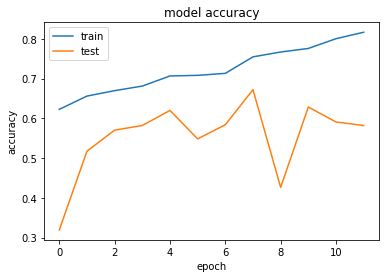

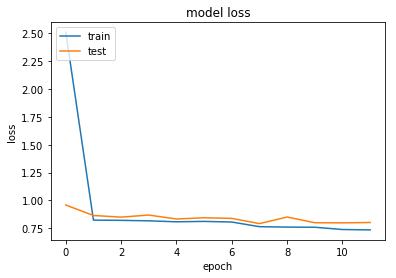

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred =  model.predict_generator(test_set, steps=test_set.samples // batch_size)


In [0]:
from sklearn import metrics
fpr, tpr, tresholds =roc_curve(y_pred,test_set.classes)

In [0]:
roc_curve(y_pred, test_set.classes.argmax(axis=-1))
auc = roc_auc_score(test_set, y_pred)
print('AUC: %.3f' % auc)

In [12]:
scores=model.evaluate_generator(test_set,steps=10)
print(scores)

scores1=model.evaluate_generator(training_set,steps=10)
print(scores1)

[0.730887097120285, 0.853125]
[0.7274989438215363, 0.8405315618578382]


In [0]:
model.save("mobile_net.h5")

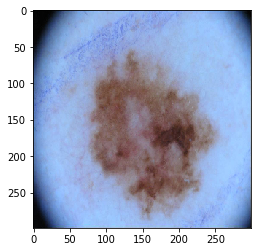

(1, 299, 299, 3)
{'MEL': 0, 'BCC': 1}
Predicted class is: [0]
**********************************************************


In [0]:


img_path ="/content/SortedImages/MEL/ISIC_0000002.jpg"
img =image.load_img(img_path,target_size=(img_rows, img_cols))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


label=(training_set.class_indices)
print(label)

# predicting images

# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=16)
print("Predicted class is:",classes.argmax(axis=-1))

print('**********************************************************')
  

In [0]:
from google.colab import files
uploaded = files.upload()

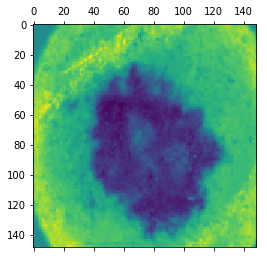

In [0]:
layer_outputs = [layer.output for layer in model.layers[1:]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


img_path ="/content/SortedImages/MEL/ISIC_0000002.jpg"
img =image.load_img(img_path,target_size=(img_rows, img_cols))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor/=255.
activations = activation_model.predict(img_tensor) 

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


In [0]:
x= base_model.inputs

def get_activations(model,model_inputs, print_shape_only=False, layer_name=5):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None][1:]

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]


    print(list_inputs)
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [0]:
get_activations(base_model,x)

----- activations -----
[[<tf.Tensor 'input_40:0' shape=(?, 224, 224, 3) dtype=float32>], 0.0]


[]

In [0]:
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [13]:
test_set.reset()
training_set.reset()

"""""pred=model.predict_generator(training_set,
                             steps=training_set.samples // batch_size,
                             verbose=1)
pred = np.argmax(pred, axis=1)
"""""
pred1=model.predict_generator(test_set,
                             steps=test_set.samples // batch_size,
                             verbose=1)
pred1 = np.argmax(pred1, axis=1)



81/81 [==============================] - 91s 1s/step


In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes[0:len(pred1)], pred1,target_names=test_set.class_indices))
print('******************************************************************')
print('training report')
#print(classification_report(training_set.classes[0:6464], pred,target_names=training_set.class_indices))

              precision    recall  f1-score   support

         MEL       0.81      0.64      0.71      1130
         BKL       0.37      0.64      0.47       656
         BCC       0.67      0.47      0.55       806

    accuracy                           0.59      2592
   macro avg       0.62      0.58      0.58      2592
weighted avg       0.65      0.59      0.60      2592

******************************************************************
training report


In [0]:
from keras import regularizers

def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = keras.applications.inception_v3.InceptionV3(include_top = False, weights ='imagenet',input_tensor=visible)

    # Adding output layers
    x = base_model.output
    x = keras.layers.GlobalMaxPooling2D()(x)
    x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.35)(x)
    
    
    
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(), 
                            loss = 'binary_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [0]:
def dense_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
   
    # Pre-build model
    base_model = keras.applications.densenet.DenseNet201(include_top = False, weights ='imagenet',input_tensor=visible)

    # Adding output layers
    x = base_model.output
    x = keras.layers.GlobalMaxPooling2D()(x)
    
    x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.4)(x)
    
   
    output = Dense(units =2, activation = 'softmax')(x)

    # Creating the whole model
    denseNet = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    denseNet.compile(optimizer = keras.optimizers.Adam(), 
                            loss = 'binary_crossentropy', 
                            metrics = ['accuracy'])
    
    return denseNet

In [0]:
def xcp_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
   
    # Pre-build model
    base_model = keras.applications.xception.Xception(include_top = False, weights ='imagenet',input_tensor=visible)

    # Adding output layers
    x = base_model.output
    x = keras.layers.GlobalMaxPooling2D()(x)
    
    '''x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    
    x=Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.4)(x)
    '''
    output = Dense(units =6, activation = 'softmax')(x)

    # Creating the whole model
    xcpNet = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    xcpNet.compile(optimizer = keras.optimizers.Adam(), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return xcpNet


In [0]:
def nas_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
   
    # Pre-build model
    base_model = keras.applications.nasnet.NASNetMobile(include_top = False, weights ='imagenet',input_tensor=visible)

    # Adding output layers
    x = base_model.output
    x = keras.layers.GlobalMaxPooling2D()(x)
    
    '''x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    
    x=Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.4)(x)
    '''
    output = Dense(units =6, activation = 'softmax')(x)

    # Creating the whole model
    nasNet = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    nasNet.compile(optimizer = keras.optimizers.Adam(), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return nasNet

In [0]:
def mob_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
   
    # Pre-build model
    base_model =keras.applications.mobilenet_v2.MobileNetV2(include_top = False, weights ='imagenet',input_tensor=visible)

    # Adding output layers
    x = base_model.output
    x = keras.layers.GlobalMaxPooling2D()(x)
    
    '''x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    
    x=Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.4)(x)
    '''
    output = Dense(units =6, activation = 'softmax')(x)

    # Creating the whole model
    mobileNet = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    mobileNet.compile(optimizer = keras.optimizers.Adam(), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return mobileNet

In [0]:
inc=inception_architecture()
den=dense_architecture()
#xcp=xcp_architecture()
#mob=mob_architecture()
#nas= nas_architecture()

87916544/87910968 [==============================] - 8s 0us/step


W0812 16:16:39.632173 140709890582400 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0812 16:16:39.705303 140709890582400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 16:16:39.720946 140709890582400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


74842112/74836368 [==============================] - 6s 0us/step


In [0]:
models=[inc,den]

def ensemble(models, visible):
    
    outputs = [model.outputs[0] for model in models]
    
    y = keras.layers.Average()(outputs)
    
    model = Model(visible, y, name='ensemble')
    
    return model

In [0]:
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)


ese =ensemble( models,visible)
ese.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
import imageio as im
from keras import models
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau





call_early=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1,
                                         mode='auto', baseline=None, restore_best_weights=False)


reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

callbacks_list=[checkpointer,reduce_lr,call_early]

history=ese.fit_generator(training_set,
                            steps_per_epoch = training_set.samples // batch_size,
                            validation_data = test_set, 
                            validation_steps = test_set.samples // batch_size,
                            callbacks=callbacks_list,
                            epochs =30,
                            class_weight=class_weights)

Epoch 1/30


In [0]:
scores=ese.evaluate_generator(test_set,steps=10)
print(scores)

scores1=ese.evaluate_generator(training_set,steps=10)
print(scores1)

[0.6492531783878803, 0.775]
[0.48390225917100904, 0.8583333373069764]
